In [ ]:
a = matrix(1:4,nrow = 4, ncol=1)
a

In [ ]:
eu = load('EU.RData')
mod = lm(formula = Seats2011 ~ Population2010, data = EU)
sumMod = summary(mod)
sumMod

In [8]:
install.packages('MASS')

In [9]:
library(MASS)

In [ ]:
dim(Boston)

In [12]:
train = 1:400
test = -train

In [20]:
variables = which(names(Boston) == c('stat','medv'))
training_data = Boston[train,variables]
testing_data = Boston[test,variables]

dim(testing_data)

[1] 106   2

In [19]:
# Split the data by using the first 400 observations as the training
# data and the remaining as the testing data
train = 1:400
test = -train

# Speficy that we are going to use only two variables (lstat and medv)
variables = which(names(Boston) ==c("lstat", "medv"))
training_data = Boston[train, variables]
testing_data = Boston[test, variables]

# Check the dimensions of the new dataset
dim(training_data)
#ans> [1] 400   2

[1] 400   2

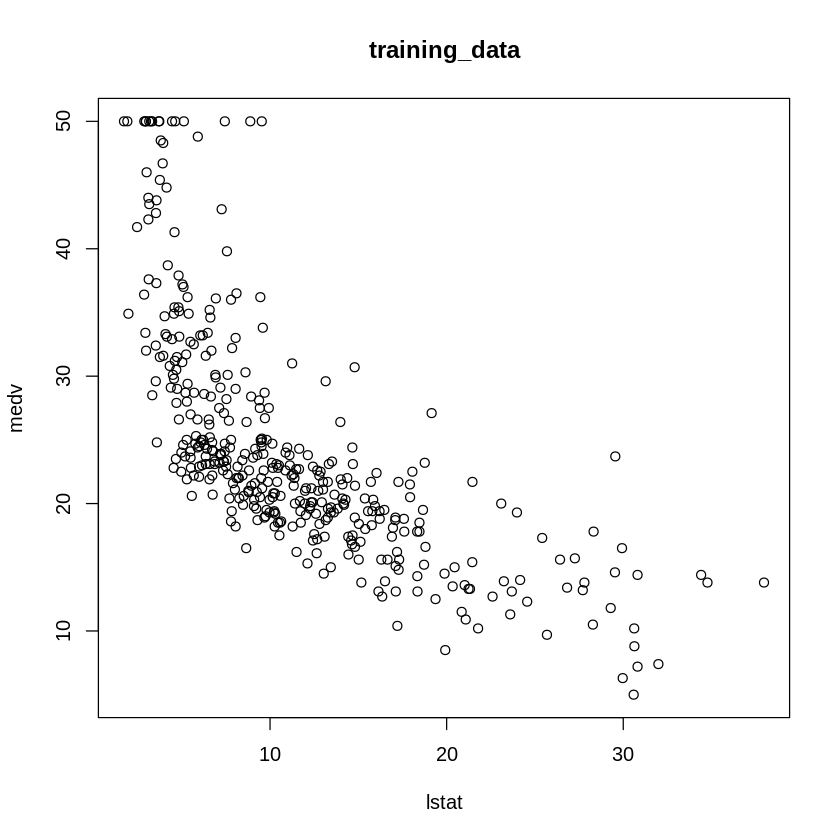

In [23]:
plot(training_data$lstat, training_data$medv,xlab = 'lstat',ylab = 'medv', main = 'training_data')


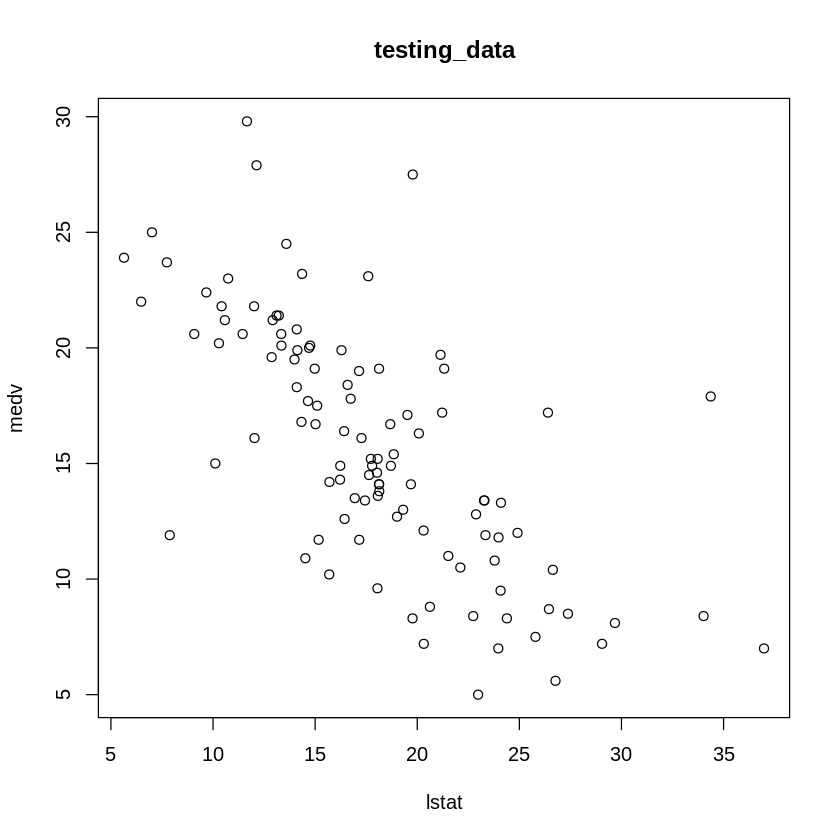

In [24]:
plot(testing_data$lstat, testing_data$medv, xlab = 'lstat',ylab = 'medv',main = 'testing_data')

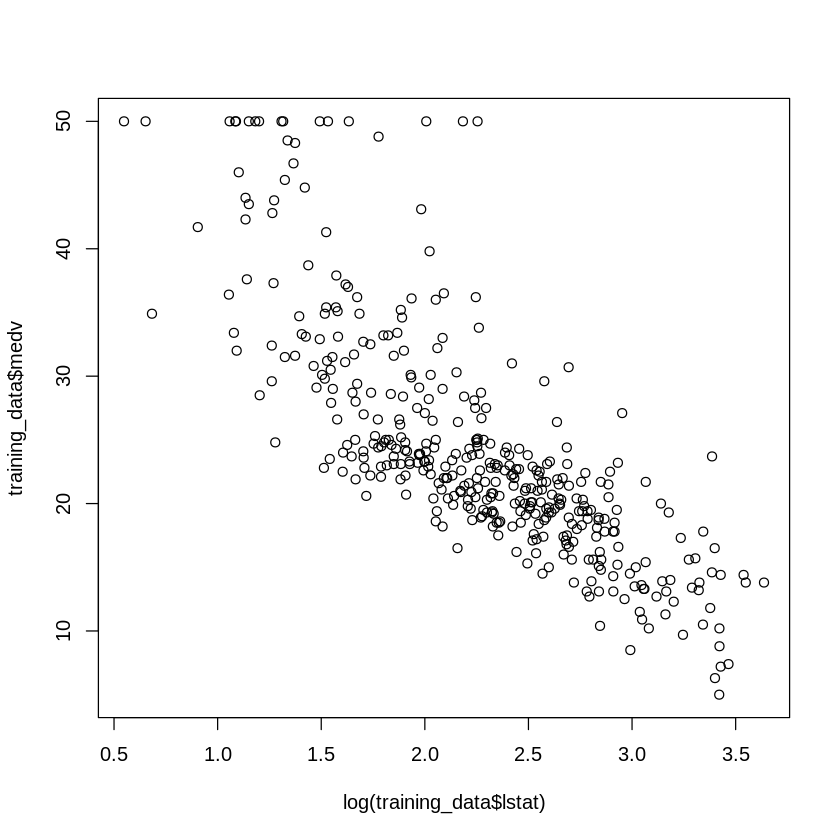

In [25]:
plot(log(training_data$lstat),training_data$medv)

In [26]:
model = lm(medv ~ log(lstat), data = training_data)
model


Call:
lm(formula = medv ~ log(lstat), data = training_data)

Coefficients:
(Intercept)   log(lstat)  
      51.78       -12.20  


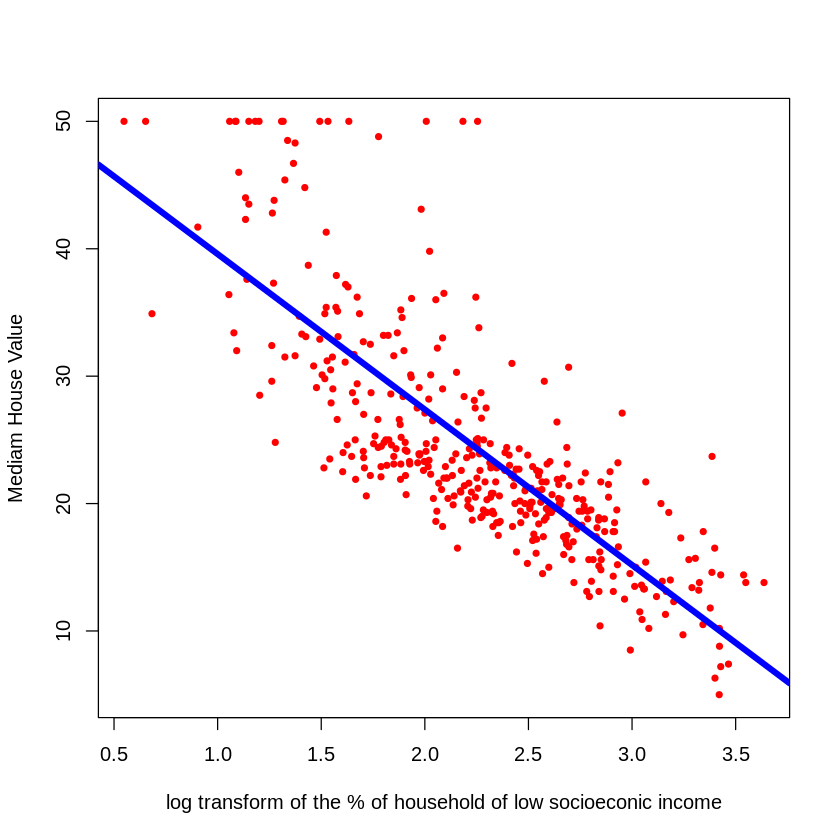

In [43]:
plot(log(training_data$lstat), training_data$medv, xlab = 'log transform of the % of household of low socioeconic income',ylab = 'Mediam House Value', col = 'red', pch = 20)

abline(model,col = 'blue',lwd = 5)

In [46]:
predict(model, data.frame(lstat = c(5,10,15)), interval = "prediction")

,fit,lwr,upr
1,32.14277,21.094872,43.19067
2,23.68432,12.652257,34.71638
3,18.73644,7.696291,29.77660


In [48]:
# Save the testing median values for houses (testing y) in y
y = testing_data$medv

# Compute the predicted value for this y (y hat)
y_hat = predict(model, data.frame(lstat = testing_data$lstat))

# Now we have both y and y_hat for our testing data. 
# let's find the mean square error
error = y-y_hat
error_squared = error^2
MSE = mean(error_squared)
MSE
#ans> [1] 17.7


[1] 17.69552

In [49]:
y = testing_data$medv
y_hat = predict(model, data.frame(lstat = testing_data$lstat))
error = y-y_hat
error_squared = error^2
MSE = mean(error_squared)
MSE

[1] 17.69552